## Data Preprocessing

In [4]:
import pandas as pd

df = pd.read_csv('../data/vehicleData2019_2023_EVs.csv')

df.head()


,County,Transaction Year,Make,Model,Model Year,Vehicle Type,Vehicle Primary Use,Electrification Level,Owner Type
0,King,2020,FORD,FUSION,2019,PASSENGER CAR,Passenger,Strong HEV (Hybrid Electric Vehicle),Individual Owner
1,Cowlitz,2020,HONDA,ACCORD,2020,PASSENGER CAR,Passenger,Strong HEV (Hybrid Electric Vehicle),Individual Owner
2,Clark,2020,FIAT,500,2015,PASSENGER CAR,Passenger,BEV (Battery Electric Vehicle),Individual Owner
3,Kitsap,2020,HONDA,INSIGHT,2019,PASSENGER CAR,Passenger,Strong HEV (Hybrid Electric Vehicle),Individual Owner
4,Snohomish,2020,LEXUS,CT,2017,PASSENGER CAR,Passenger,Strong HEV (Hybrid Electric Vehicle),Individual Owner


In [5]:
print("Original columns:", df.columns.tolist())

Original columns: ['County', 'Transaction Year', 'Make', 'Model', 'Model Year', 'Vehicle Type', 'Vehicle Primary Use', 'Electrification Level', 'Owner Type']


## EDA

### 查看不同county对汽车品牌的倾向

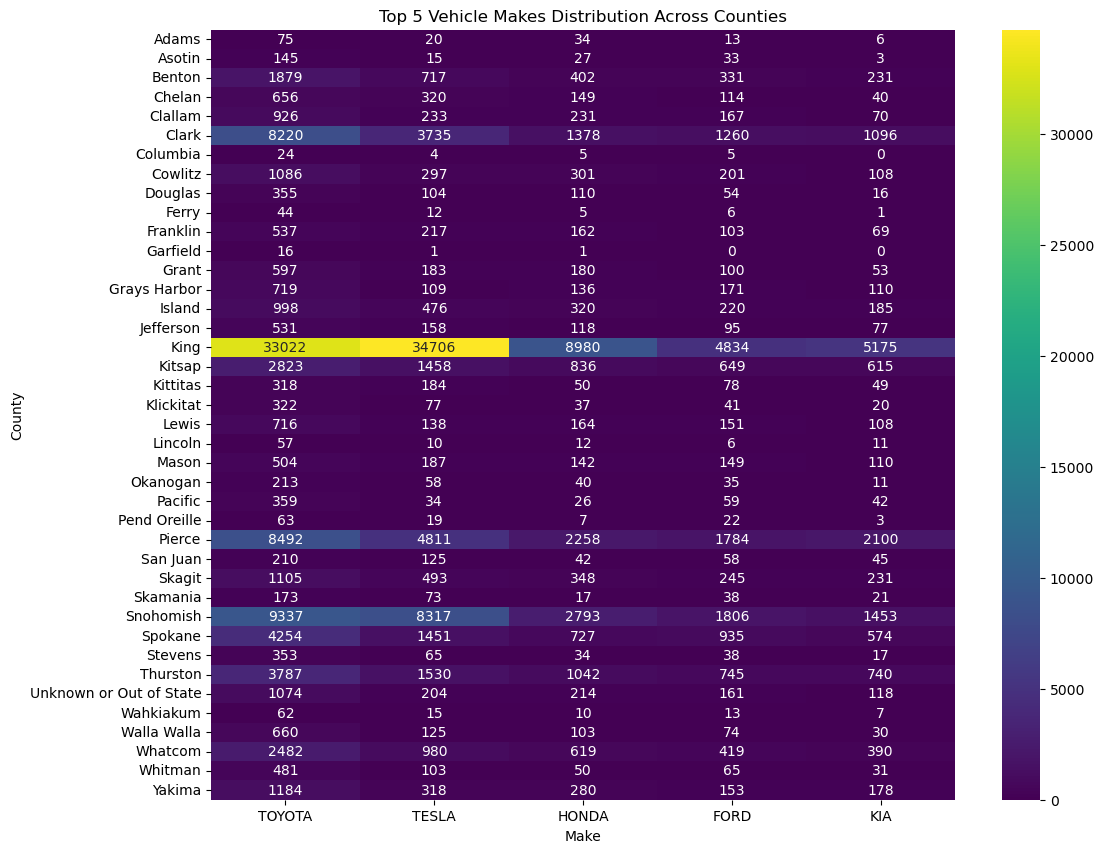

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_data = df.groupby(['County', 'Make']).size().unstack(fill_value=0)

# get top 5 manufact
top_makes = grouped_data.sum().nlargest(5).index
filtered_data = grouped_data[top_makes]

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_data, annot=True, cmap='viridis', fmt='g')
plt.title('Top 5 Vehicle Makes Distribution Across Counties')
plt.xlabel('Make')
plt.ylabel('County')
plt.show()

# 仅在King county中Tesla注册量高于TOYOTA，其余均为TOYOTA电车销售量更高，其次Tesla

In [14]:
# check all values in Electrification Level
df['Electrification Level'].unique().tolist()

['Strong HEV (Hybrid Electric Vehicle)',
 'BEV (Battery Electric Vehicle)',
 'HEV (Hybrid Electric Vehicle) - Level Unknown',
 'PHEV (Plug-in Hybrid Electric Vehicle)',
 'Mild HEV (Hybrid Electric Vehicle)']

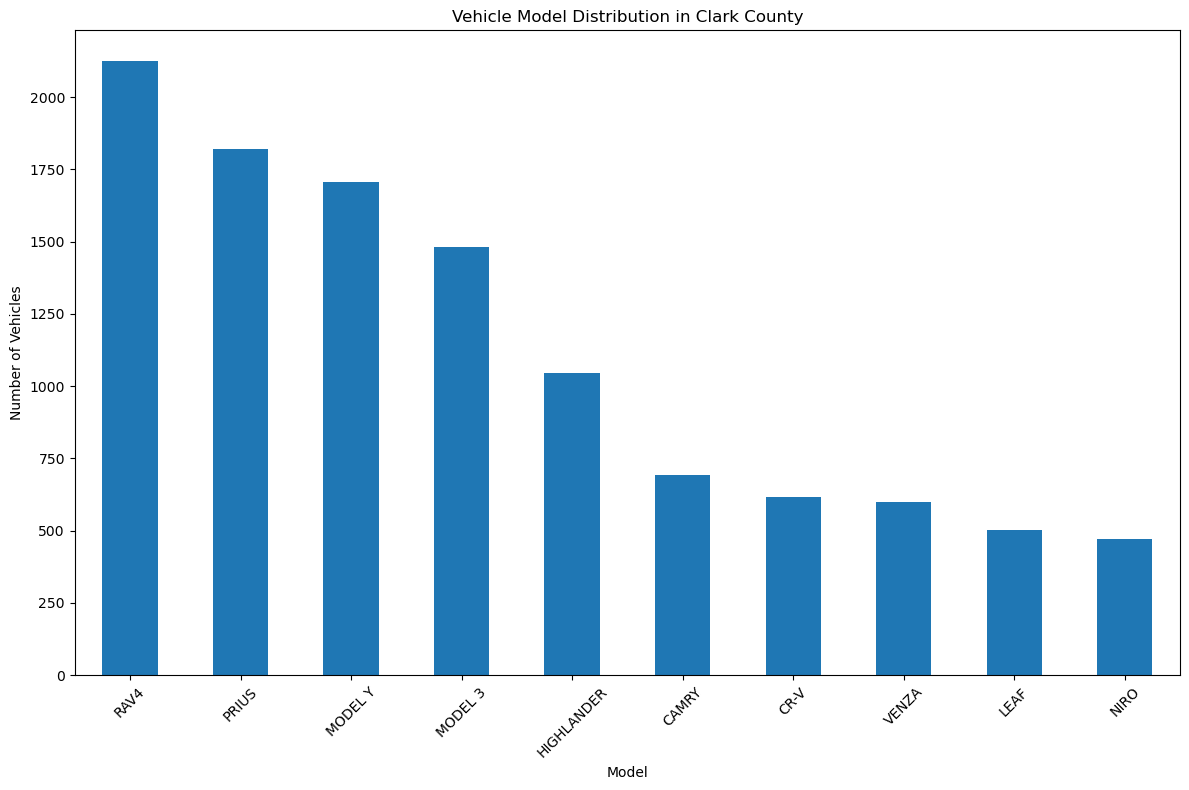

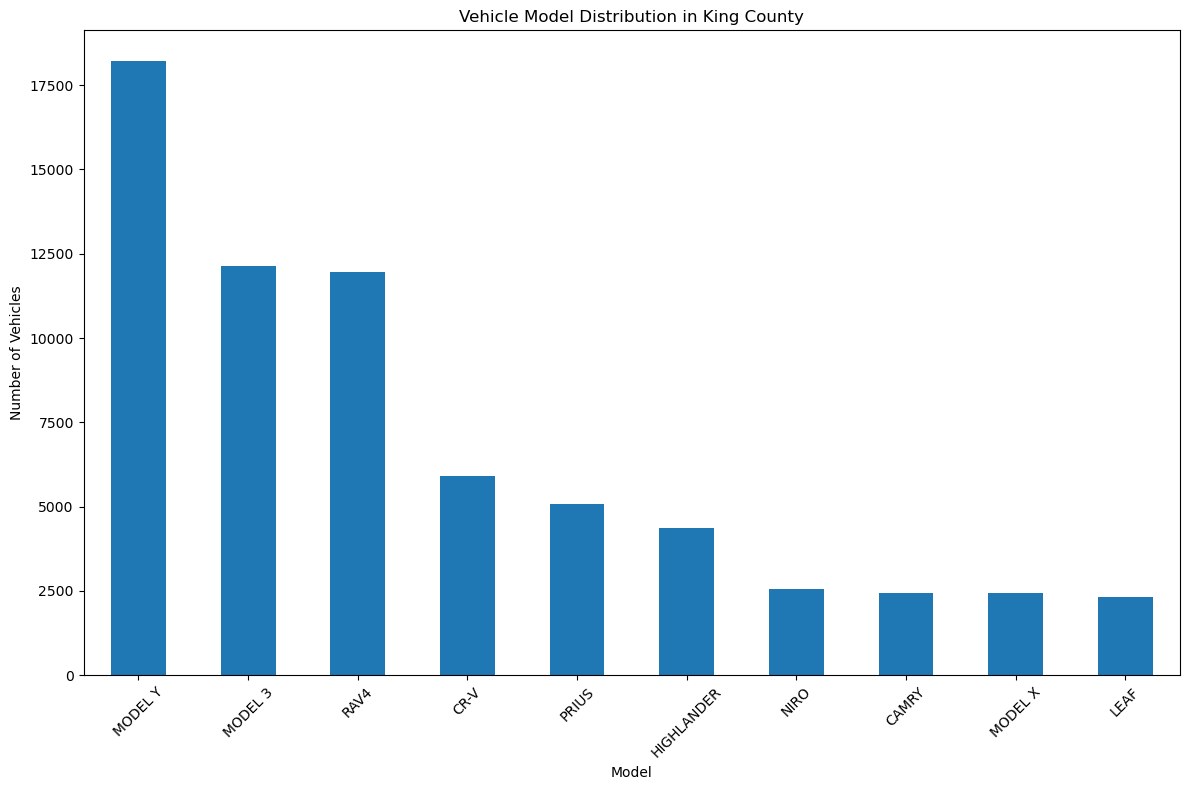

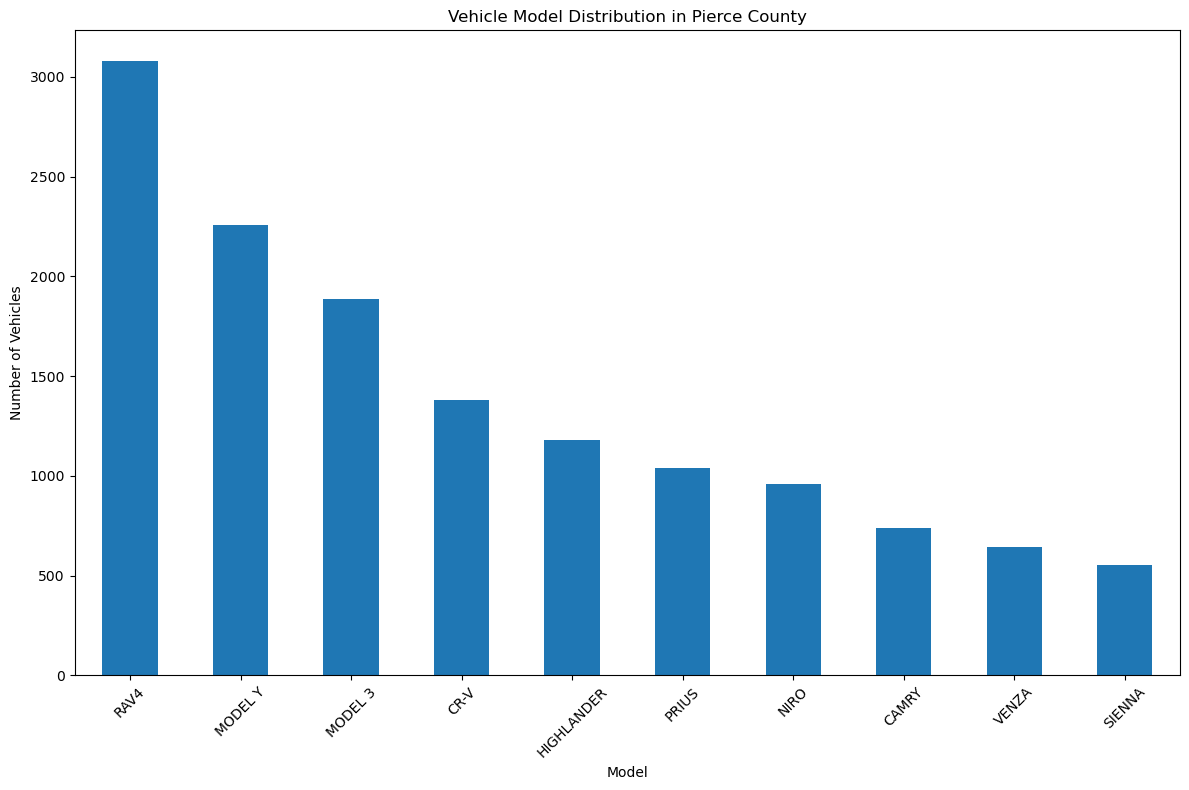

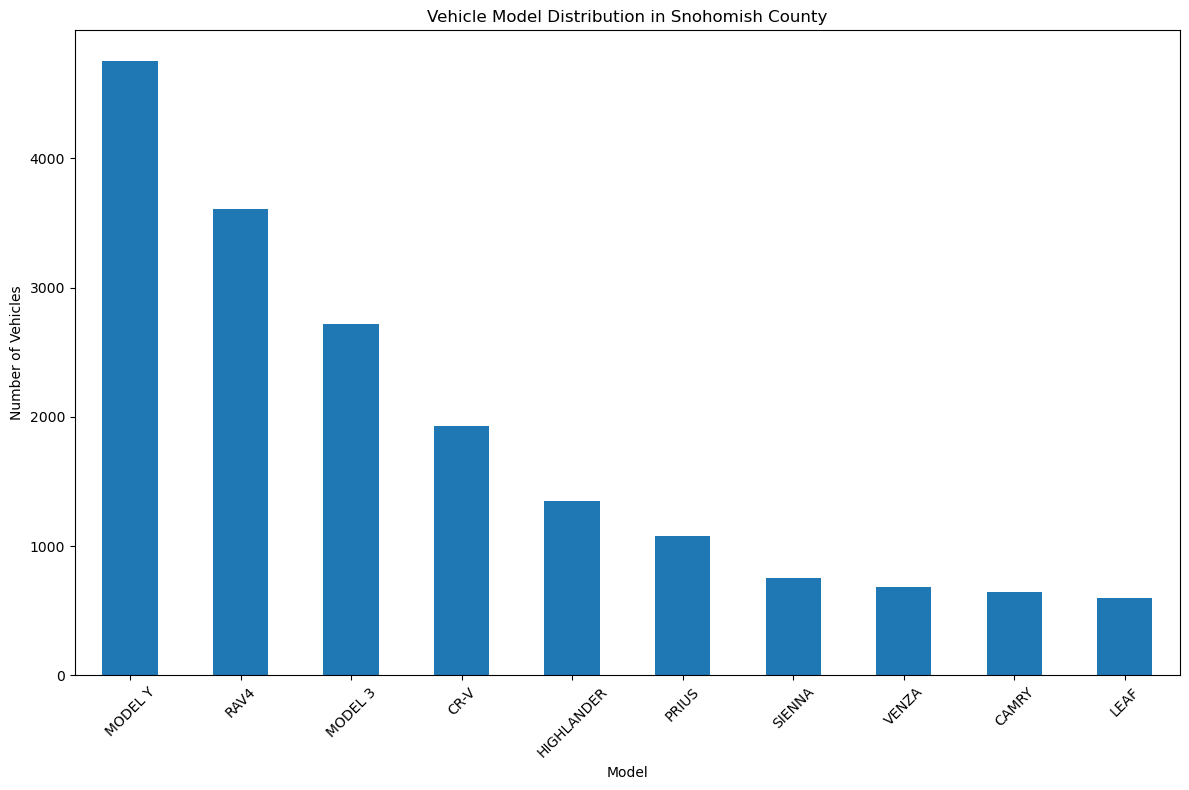

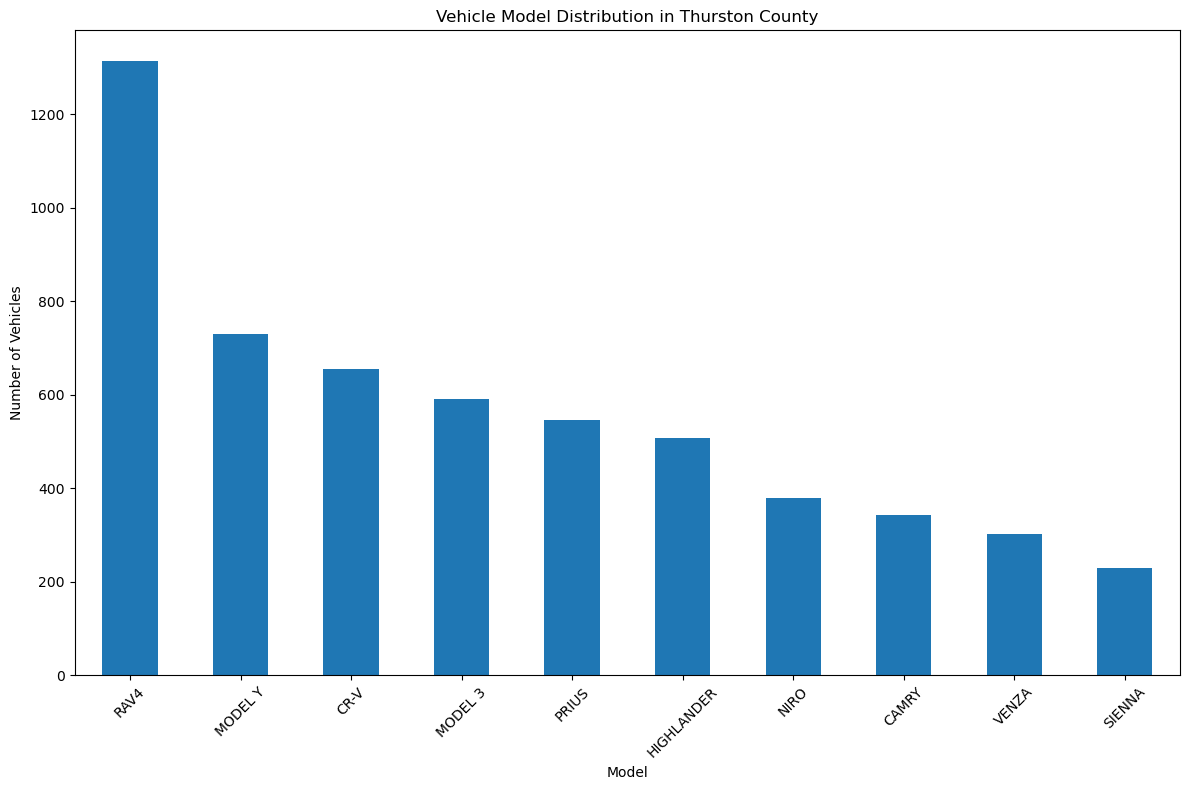

In [15]:
target_counties = ['Clark', 'King', 'Pierce', 'Snohomish', 'Thurston']

filtered_df = df[df['County'].isin(target_counties)]

# groupby and count
model_counts = filtered_df.groupby(['County', 'Model']).size().unstack(fill_value=0)

# viz
for county in model_counts.index:
    plt.figure(figsize=(12, 8))
    model_counts.loc[county].sort_values(ascending=False)[:10].plot(kind='bar')  # 只展示每个县区前10名最常见的型号
    plt.title(f'Vehicle Model Distribution in {county} County')
    plt.xlabel('Model')
    plt.ylabel('Number of Vehicles')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# top 5 各county下不同型号注册量

In [16]:
df['Make'].value_counts()

TOYOTA                         88859
TESLA                          62082
HONDA                          22390
FORD                           15431
KIA                            14144
                               ...  
AIR EASY LLC DBA AVENTURA-X        1
THAMLEV                            1
CRUISE CAR                         1
COLUMBIA                           1
SSR                                1
Name: Make, Length: 113, dtype: int64

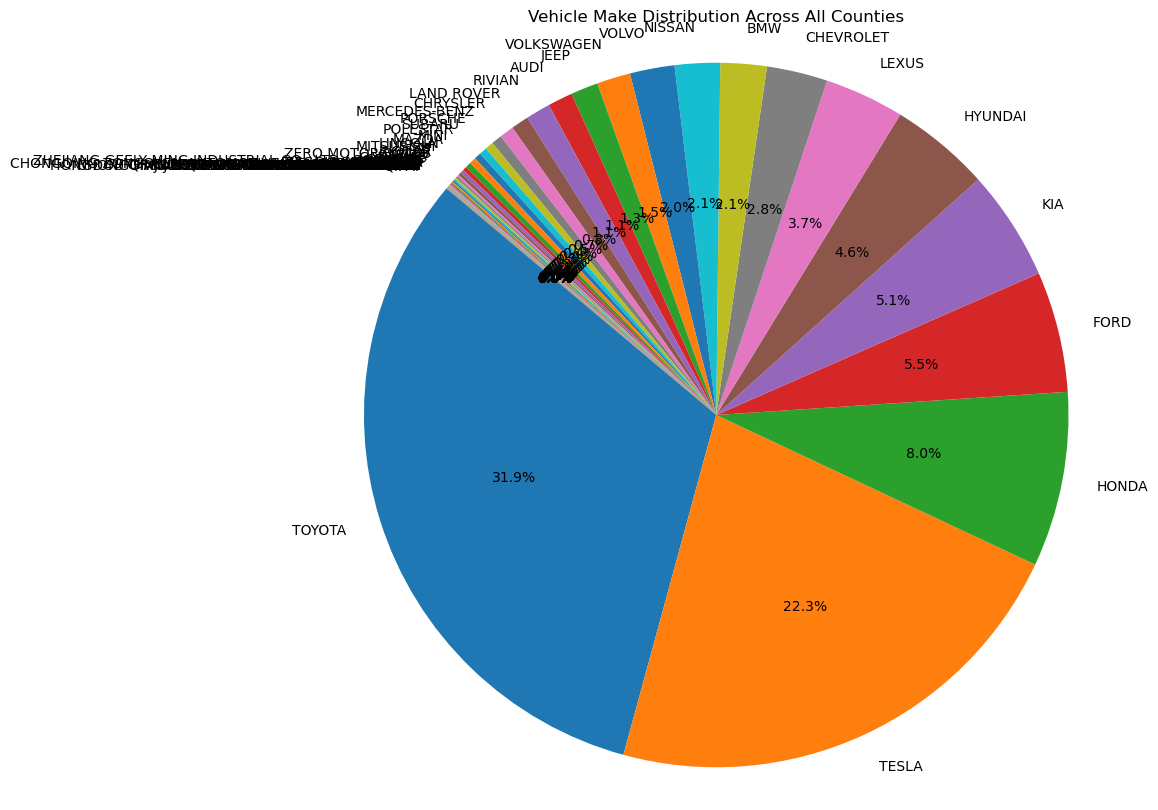

In [17]:
# pie chart about manufacture
make_counts = df['Make'].value_counts()

# 汽车品牌总饼图
plt.figure(figsize=(10, 10))
plt.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Vehicle Make Distribution Across All Counties')
plt.show()

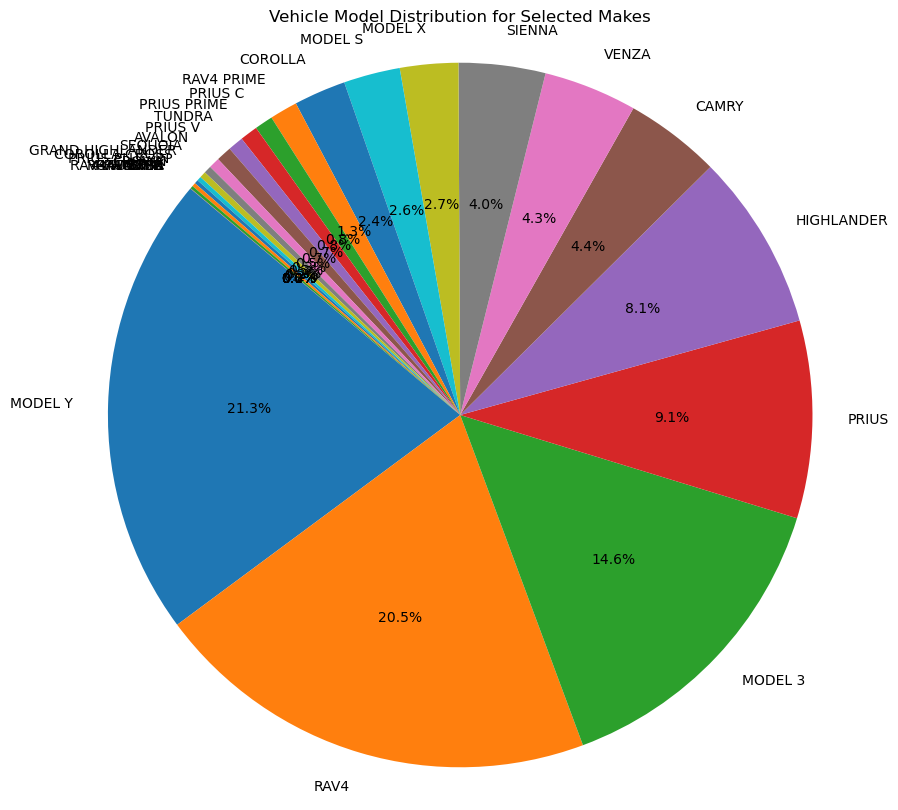

In [21]:
# Based on previous pie chart, select top 5 manufact to make a model pie chart (丰田和Tesla汽车型号饼图)

selected_makes = ['TOYOTA', 'TESLA']
filtered_df = df[df['Make'].isin(selected_makes)]

# 按型号分组并计算数量
model_counts = filtered_df.groupby('Model').size().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Vehicle Model Distribution for Selected Makes')
plt.show()

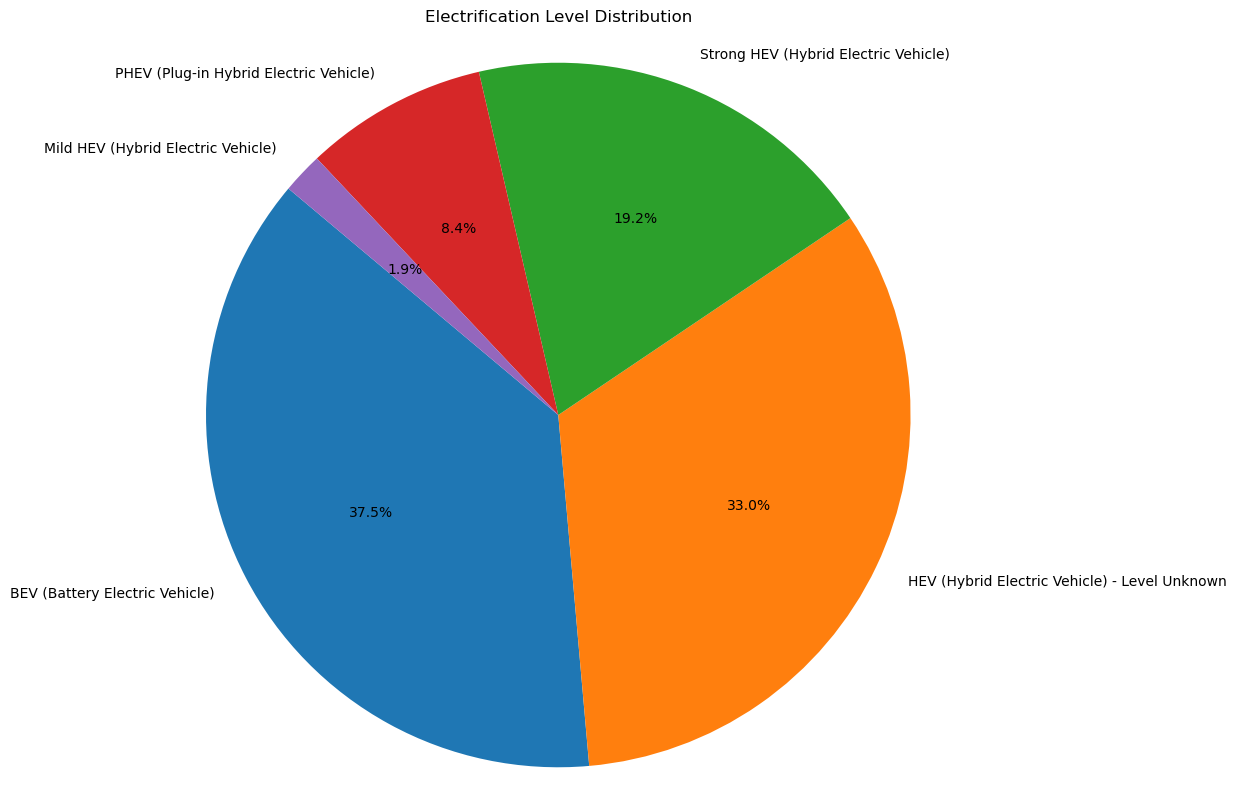

In [22]:
# pie chart of Electrification Level
electrification_counts = df['Electrification Level'].value_counts()

# 电车种类饼图
plt.figure(figsize=(10, 10))
plt.pie(electrification_counts, labels=electrification_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Electrification Level Distribution')
plt.show()

由于BEV占比最高，后续选择重点研究BEV电车

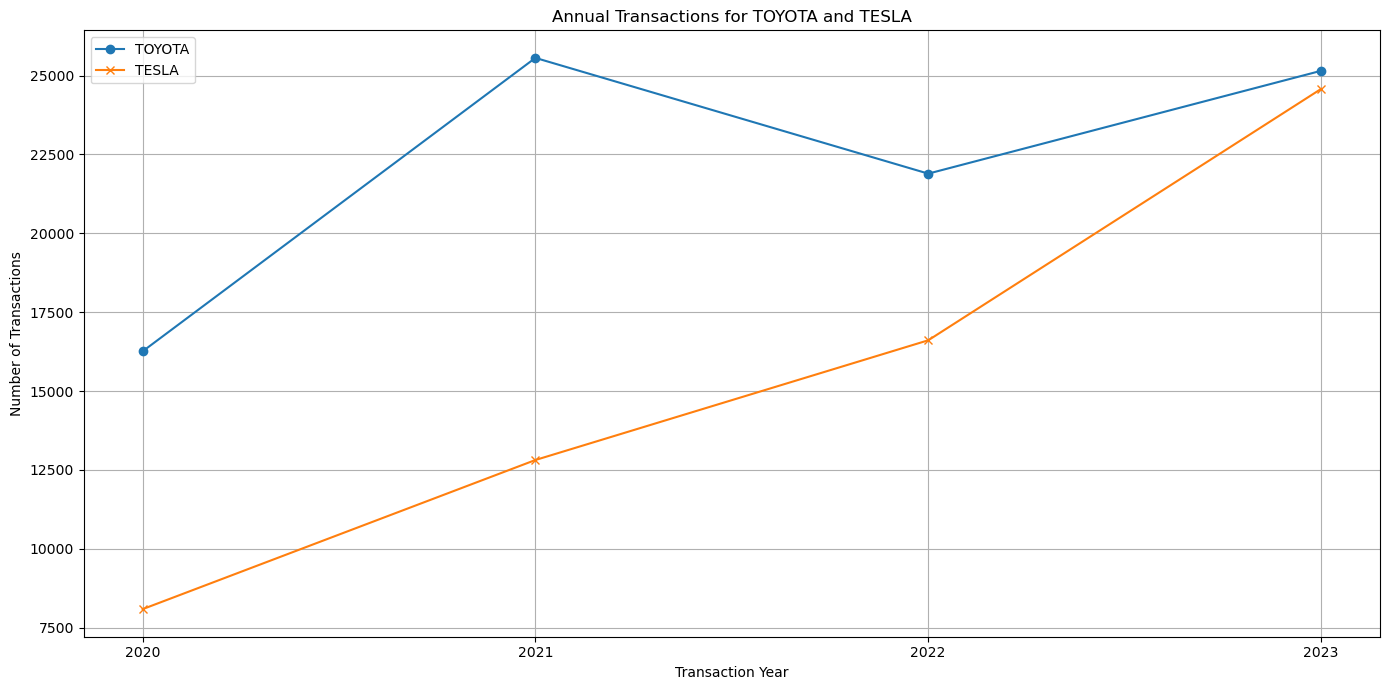

In [31]:
toyota_df = df[df['Make'] == 'TOYOTA']
tesla_df = df[df['Make'] == 'TESLA']

# 按Transaction Year分组并计算每年的交易数量
toyota_transactions_per_year = toyota_df.groupby('Transaction Year').size()
tesla_transactions_per_year = tesla_df.groupby('Transaction Year').size()

# 绘制折线图
plt.figure(figsize=(14, 7))

# TOYOTA折线图
plt.plot(toyota_transactions_per_year.index, toyota_transactions_per_year.values, marker='o', label='TOYOTA')

# TESLA折线图
plt.plot(tesla_transactions_per_year.index, tesla_transactions_per_year.values, marker='x', label='TESLA')

plt.title('Annual Transactions for TOYOTA and TESLA')
plt.xlabel('Transaction Year')
plt.ylabel('Number of Transactions')
plt.xticks([2020, 2021, 2022, 2023])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

特斯拉的销售量比起丰田有更显著的增长，后续着重选择对Tesla研究